In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cols = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose (incomplete)', 
        'Credit amount', 'Savings account/bonds', 'Present employment since (incomplete)', 'Instalment rate in % of disposable income',
       'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age', 'Other installment plans', 
       'Housing', 'Number of existing credits at this bank', 'Job (incomplete)', 'Number of people being liable to provide maintenance for',
       'Telephone', 'Foreign worker (incomplete)', 'Creditworthy']

In [6]:
#Here we read the file
df = pd.read_csv('kredit.dat', sep='\t', header=None, names=cols, na_values="?" )

In [7]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [8]:
df.shape

(1000, 21)

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("This dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
#since the column is categorical, then the missing values will be replaced by the mode of the same column.

ModeValue=df['Present employment since (incomplete)'].mode()[0]
df['Present employment since (incomplete)']=df['Present employment since (incomplete)'].fillna(value=ModeValue)


ModeValue1=df['Foreign worker (incomplete)'].mode()[0]
df['Foreign worker (incomplete)']=df['Foreign worker (incomplete)'].fillna(value=ModeValue1)



ModeValue2=df['Job (incomplete)'].mode()[0]
df['Job (incomplete)']=df['Job (incomplete)'].fillna(value=ModeValue2)



ModeValue3=df['Purpose (incomplete)'].mode()[0]
df['Purpose (incomplete)']=df['Purpose (incomplete)'].fillna(value=ModeValue3)


In [11]:
missing_values_table(df)

This dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [13]:
#Replacing Missing Values.
#See that there are also categorical values in the dataset, for this, i used One Hot Encoding.
'''One-hot encoding turns your categorical data into a binary vector representation.
   Pandas get dummies makes this very easy! 
   This means that for each unique value in a column, a new column is created.
   The values in this column are represented as 1s and 0s,
   depending on whether the value matches the column header'''
df2 = df.copy()
onehot_df2 = pd.get_dummies(df2, dummy_na=True)
onehot_df2

,Duration in month,Credit amount,Instalment rate in % of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Creditworthy,Status of existing checking account_A11,Status of existing checking account_A12,...,Job (incomplete)_A172,Job (incomplete)_A173,Job (incomplete)_A174,Job (incomplete)_nan,Telephone_A191,Telephone_A192,Telephone_nan,Foreign worker (incomplete)_A201,Foreign worker (incomplete)_A202,Foreign worker (incomplete)_nan
0,36,2299,4,4,39,1,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,18,1239,4,4,61,1,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
2,24,947,4,3,38,1,2,2,0,0,...,0,1,0,0,1,0,0,1,0,0
3,15,1478,4,3,33,2,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,24,1525,4,3,34,1,2,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,1572,4,4,36,1,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
996,6,1198,4,4,35,1,1,2,1,0,...,0,1,0,0,1,0,0,1,0,0
997,12,685,2,3,25,1,1,2,0,1,...,0,1,0,0,1,0,0,1,0,0
998,24,1381,4,2,35,1,1,2,1,0,...,0,1,0,0,1,0,0,1,0,0


In [14]:
# Separate df into the X and pop out 'Creditworthy' into y since it's the target we want to predict

X = onehot_df2.copy()

# Change the last column to boolean. Convert 1 - Creditworhty and 2 - Not creditworthy to True and False respectively

X["Creditworthy"] = np.where(X["Creditworthy"] == 1, 'YES', "NO")
y = X.pop('Creditworthy')


In [15]:
def remove_collinear_features(X, threshold):
    
    # Calculate the correlation matrix
    corr_matrix = X.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value

                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    X = X.drop(columns = drops)
    
               
    return X

In [16]:
X = remove_collinear_features(X, 0.4);

In [24]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [25]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split

# Split into 75% training and 25% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 63)
(250, 63)
(750,)
(250,)


In [39]:

# Will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Random Forest Classification
# 5 - XGBoost 

# Function to calculate KFold Cross Validation

def cross_val(X, y, model):
    # Applying k-Fold Cross Validation
    
    from sklearn.model_selection import cross_val_score
    
    accuracies = cross_val_score(estimator = model, X = X, y = y)
    
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
    
    # Train the model
    clf = model.fit(X_train, y_train)
    
    
    # Make predictions and evalute
    y_pred = model.predict(X_test)
    model_cross = cross_val(X, y, model)
    
    # Print the precision, recall, F-measure and support
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plot_confusion_matrix(clf, X_test, y_test)
    
    # Plot ROC curve
   
    fig, ax = plt.subplots()
    
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=1)
    
    
    
    # Return the performance metric
    return model_cross

              precision    recall  f1-score   support

          NO       0.67      0.40      0.50        82
         YES       0.76      0.90      0.82       168

    accuracy                           0.74       250
   macro avg       0.71      0.65      0.66       250
weighted avg       0.73      0.74      0.72       250



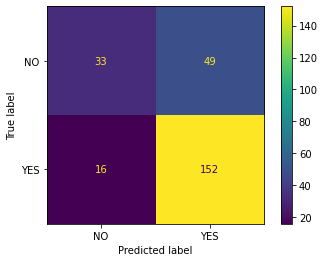

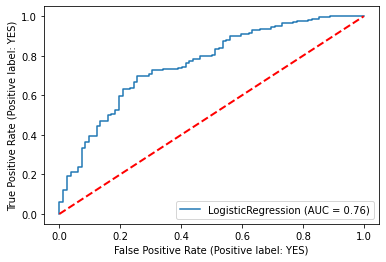

In [40]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0, max_iter=4000, )
log_cross = fit_and_evaluate(log)


              precision    recall  f1-score   support

          NO       0.39      0.13      0.20        82
         YES       0.68      0.90      0.77       168

    accuracy                           0.65       250
   macro avg       0.54      0.52      0.49       250
weighted avg       0.59      0.65      0.59       250



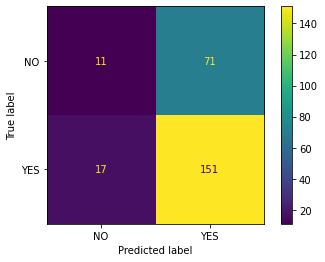

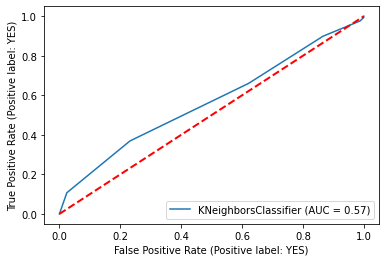

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7)
knn_cross = fit_and_evaluate(knn)

              precision    recall  f1-score   support

          NO       0.83      0.06      0.11        82
         YES       0.68      0.99      0.81       168

    accuracy                           0.69       250
   macro avg       0.76      0.53      0.46       250
weighted avg       0.73      0.69      0.58       250



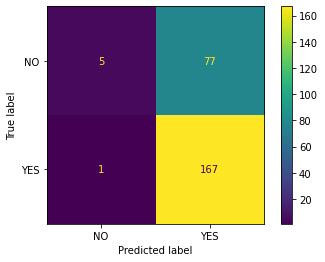

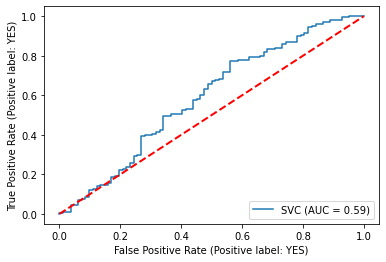

In [42]:
from sklearn.svm import SVC

svc = SVC()
svc_cross = fit_and_evaluate(svc)

              precision    recall  f1-score   support

          NO       0.62      0.37      0.46        82
         YES       0.74      0.89      0.81       168

    accuracy                           0.72       250
   macro avg       0.68      0.63      0.64       250
weighted avg       0.70      0.72      0.70       250



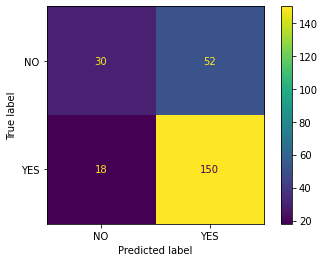

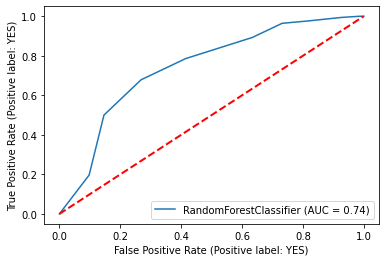

In [43]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)
